In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# print the data w/o omitting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Import Necessary Data

#### Import Emission Data

In [33]:
# Import Material Inflow Data
Emission_data = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Emission/MI Emission.csv')
Emission_data = Emission_data.rename(columns={Emission_data.columns[0]: 'Material'})
Emission_data = Emission_data.set_index(Emission_data.columns[0])

Emission_single = {'BAU 2020': Emission_data.loc['Total (PC+Iron+Wood+CSA)', 'BAU2020_Annual'], 'BAU 2040' : Emission_data.loc['Total (PC+Iron+Wood+CSA)', 'BAU2040_Annual'], \
            'Compact City': Emission_data.loc['Total (PC+Iron+Wood+CSA)', 'Compact_City_Annual'], 'Effective Design': Emission_data.loc['Total (PC+Iron+Wood+CSA)', "Effective_Design_Annual"], \
                'Intensive Use': Emission_data.loc['Total (PC+Iron+Wood+CSA)', "Intensive_Use_Annual"], 'Mass-Timber': Emission_data.loc['Total (PC+Iron+Wood+CSA)', "Mass_Timber_Annual"], \
                    'CSA': Emission_data.loc['Total (PC+Iron+Wood+CSA)', "Alternative_Cement_Annual"], 'AAC': Emission_data.loc['Total (PC+Iron+Wood+AAC)', "Alternative_Cement_Annual"]}

Emission_single

{'BAU 2020': 5419.295247230215,
 'BAU 2040': 5342.447011596862,
 'Compact City': 5257.14310950844,
 'Effective Design': 4858.788012607018,
 'Intensive Use': 4273.957609277491,
 'Mass-Timber': 4512.858679702835,
 'CSA': 4926.196876864804,
 'AAC': 4450.482437171019}

In [34]:
# Import Material Inflow Data
Emission_data = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Emission/MI Emission.csv')
Emission_data = Emission_data.rename(columns={Emission_data.columns[0]: 'Material'})
Emission_data = Emission_data.set_index(Emission_data.columns[0])

Emission = {'BAU 2020': Emission_data.loc['Total (PC+Iron+Wood+CSA)', 'BAU2020_Annual'], 'BAU 2040' : Emission_data.loc['Total (PC+Iron+Wood+CSA)', 'BAU2040_Annual'], \
            'Compact City': Emission_data.loc['Total (PC+Iron+Wood+CSA)', 'Compact_City_Annual'], '+ Effective Design': Emission_data.loc['Total (PC+Iron+Wood+CSA)', "'+ Effective_Design_Annual"], \
                '+ Intensive Use': Emission_data.loc['Total (PC+Iron+Wood+CSA)', "'+ Intensive_Use_Annual"], '+ Mass-Timber': Emission_data.loc['Total (PC+Iron+Wood+CSA)', "'+ Mass_Timber_Annual"], \
                    '+ CSA': Emission_data.loc['Total (PC+Iron+Wood+CSA)', "'+ Alternative_Cement_Annual"], '+ AAC': Emission_data.loc['Total (PC+Iron+Wood+AAC)', "'+ Alternative_Cement_Annual"]}

Emission

{'BAU 2020': 5419.295247230215,
 'BAU 2040': 5342.447011596862,
 'Compact City': 5257.14310950844,
 '+ Effective Design': 4781.206788872622,
 '+ Intensive Use': 3820.3386423607,
 '+ Mass-Timber': 3329.3541617744427,
 '+ CSA': 3546.092396498905,
 '+ AAC': 3232.668115513999}

#### Import Cost Data

In [35]:
MICost_data = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Cost/Cost MI.csv')
MICost_data = MICost_data.rename(columns={MICost_data.columns[0]: 'Material'})
MICost_data = MICost_data.set_index(MICost_data.columns[0])

strategies = ['BAU 2020', 'BAU 2040', 'Compact City', 'Effective Design', 'Intensive Use', 'Mass-Timber', 'CSA', 'AAC']
#Total_AAC = [5397751, 5318685, 5233787, 5011886, 4006420, 4381932, 4223877, 4333477]
Total_AAC_sigle = []

for scenario in ['BAU2020_Annual','BAU2040_Annual', 'Compact_City_Annual', "Effective_Design_Annual", "Intensive_Use_Annual", "Mass_Timber_Annual", "Alternative_Cement_Annual"]:
    Total_AAC_sigle.append(MICost_data.loc['Total (PC_Concrete+Iron+Wood+CSA)', scenario])

# Add AAC Concrete
Total_AAC_sigle.append(MICost_data.loc['Total (PC_Concrete+Iron+Wood+AAC)', scenario])

Cost_dictionary_single = dict(zip(strategies, Total_AAC_sigle))
Cost_dictionary_single

{'BAU 2020': 5393648.546231867,
 'BAU 2040': 5317163.993260474,
 'Compact City': 5232263.790098031,
 'Effective Design': 5091728.188133454,
 'Intensive Use': 4253731.19460838,
 'Mass-Timber': 5675502.701644482,
 'CSA': 5649763.204523692,
 'AAC': 5816062.8101553}

In [36]:
MICost_data = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Cost/Cost MI.csv')
MICost_data = MICost_data.rename(columns={MICost_data.columns[0]: 'Material'})
MICost_data = MICost_data.set_index(MICost_data.columns[0])

strategies = ['BAU 2020', 'BAU 2040', 'Compact City', '+ Effective Design', '+ Intensive Use', '+ Mass-Timber', '+ CSA', '+ AAC']
#Total_AAC = [5397751, 5318685, 5233787, 5011886, 4006420, 4381932, 4223877, 4333477]
Total_AAC = []

for scenario in ['BAU2020_Annual','BAU2040_Annual', 'Compact_City_Annual', "'+ Effective_Design_Annual", "'+ Intensive_Use_Annual", "'+ Mass_Timber_Annual", "'+ Alternative_Cement_Annual"]:
    Total_AAC.append(MICost_data.loc['Total (PC_Concrete+Iron+Wood+CSA)', scenario])

# Add AAC Concrete
Total_AAC.append(MICost_data.loc['Total (PC_Concrete+Iron+Wood+AAC)', scenario])

Cost_dictionary = dict(zip(strategies, Total_AAC))
Cost_dictionary

{'BAU 2020': 5393648.546231867,
 'BAU 2040': 5317163.993260474,
 'Compact City': 5232263.790098031,
 '+ Effective Design': 5010427.562806039,
 '+ Intensive Use': 4003493.443848829,
 '+ Mass-Timber': 4380633.442020688,
 '+ CSA': 4222626.31001413,
 '+ AAC': 4332192.743096781}

## Calculate Cost Effectiveness

## Make Figure for cost vs emission

### For single strategies

/var/folders/45/0prgpk010y5d3wglp3r_dz7r0000gn/T/ipykernel_42941/660680915.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Accent', len(df_emission_cost_single))(range(len(df_emission_cost_single)))


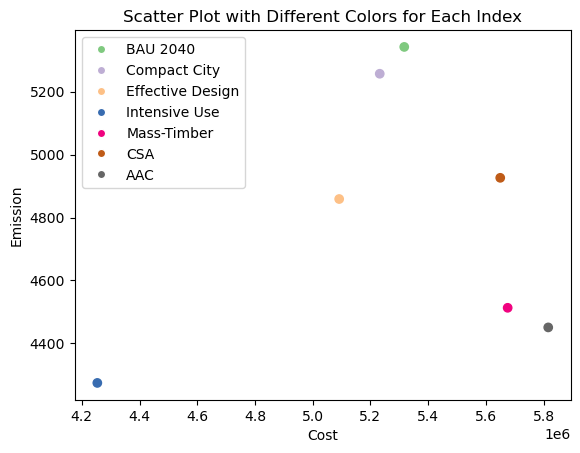

In [37]:
df_emission_single = pd.DataFrame.from_dict(Emission_single, orient='index', columns=['Emission'])
df_cost_single = pd.DataFrame.from_dict(Cost_dictionary_single, orient='index', columns=['Cost'])

df_emission_cost_single = df_emission_single.merge(df_cost_single, left_index=True, right_index=True)
df_emission_cost_single = df_emission_cost_single.drop(df_emission_cost_single.index[0])

x = df_emission_cost_single['Cost']
y = df_emission_cost_single['Emission']

# Create a list of colors using Pastel1 colormap
colors = plt.cm.get_cmap('Accent', len(df_emission_cost_single))(range(len(df_emission_cost_single)))

plt.scatter(x, y, c=colors)
plt.xlabel('Cost')
plt.ylabel('Emission')
plt.title('Scatter Plot with Different Colors for Each Index')

# Create a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=index)
                   for index, color in zip(df_emission_cost_single.index, colors)]
plt.legend(handles=legend_elements)

plt.show()


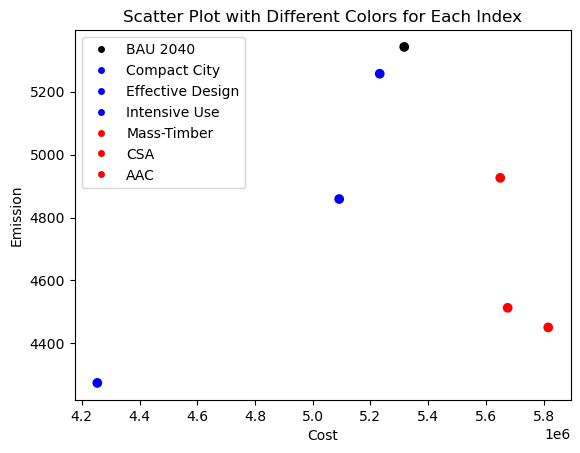

In [42]:
df_emission_single = pd.DataFrame.from_dict(Emission_single, orient='index', columns=['Emission'])
df_cost_single = pd.DataFrame.from_dict(Cost_dictionary_single, orient='index', columns=['Cost'])

df_emission_cost_single = df_emission_single.merge(df_cost_single, left_index=True, right_index=True)
df_emission_cost_single = df_emission_cost_single.drop(df_emission_cost_single.index[0])

x = df_emission_cost_single['Cost']
y = df_emission_cost_single['Emission']

# Create a mapping between index names and colors
index_colors = {
    'BAU 2040': 'black',
    'Compact City': 'blue',
    'Effective Design': 'blue',
    'Intensive Use': 'blue',
    'Mass-Timber': 'red',
    'CSA': 'red',
    'AAC': 'red'
    # Add more index-color mappings as needed
}

# Generate a list of colors based on the index names
colors = [index_colors.get(index, 'black') for index in df_emission_cost_single.index]

plt.scatter(x, y, c=colors)
plt.xlabel('Cost')
plt.ylabel('Emission')
plt.title('Scatter Plot with Different Colors for Each Index')

# Create a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=index)
                   for index, color in index_colors.items()]
plt.legend(handles=legend_elements)

plt.show()
plt.savefig('')

### For Multiplicative Case

/var/folders/45/0prgpk010y5d3wglp3r_dz7r0000gn/T/ipykernel_42941/3737543823.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Accent', len(df_emission_cost))(range(len(df_emission_cost)))


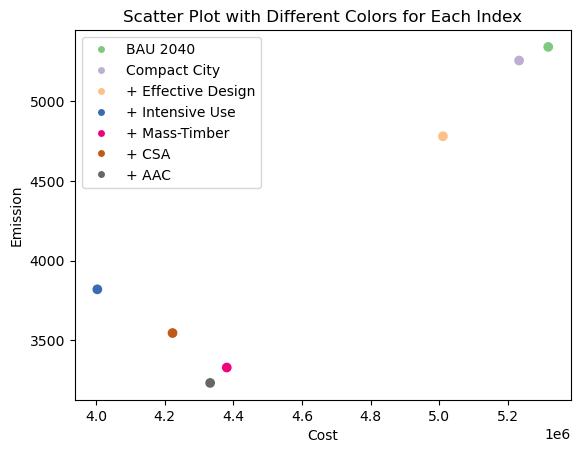

In [43]:
df_emission = pd.DataFrame.from_dict(Emission, orient='index', columns=['Emission'])
df_cost = pd.DataFrame.from_dict(Cost_dictionary, orient='index', columns=['Cost'])
df_emission

df_emission_cost = df_emission.merge(df_cost, left_index=True, right_index=True)
df_emission_cost = df_emission_cost.drop(df_emission_cost.index[0])
df_emission_cost

x = df_emission_cost['Cost']
y = df_emission_cost['Emission']

# Create a list of colors using Pastel1 colormap
colors = plt.cm.get_cmap('Accent', len(df_emission_cost))(range(len(df_emission_cost)))

plt.scatter(x, y, c=colors)
plt.xlabel('Cost')
plt.ylabel('Emission')
plt.title('Scatter Plot with Different Colors for Each Index')

# Create a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=index)
                   for index, color in zip(df_emission_cost.index, colors)]
plt.legend(handles=legend_elements)

plt.show()


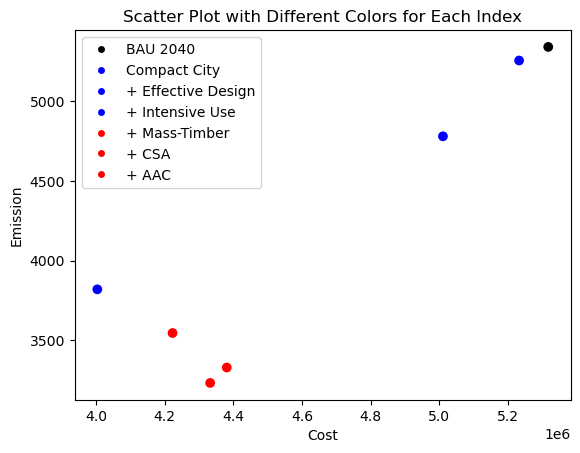

In [48]:
df_emission = pd.DataFrame.from_dict(Emission, orient='index', columns=['Emission'])
df_cost = pd.DataFrame.from_dict(Cost_dictionary, orient='index', columns=['Cost'])

df_emission_cost = df_emission.merge(df_cost, left_index=True, right_index=True)
df_emission_cost = df_emission_cost.drop(df_emission_cost.index[0])

x = df_emission_cost['Cost']
y = df_emission_cost['Emission']

# Create a mapping between index names and colors
index_colors = {
    'BAU 2040': 'black',
    'Compact City': 'blue',
    '+ Effective Design': 'blue',
    '+ Intensive Use': 'blue',
    '+ Mass-Timber': 'red',
    '+ CSA': 'red',
    '+ AAC': 'red'
    # Add more index-color mappings as needed
}

# Generate a list of colors based on the index names
colors = [index_colors.get(index, 'black') for index in df_emission_cost.index]

plt.scatter(x, y, c=colors)
plt.xlabel('Cost')
plt.ylabel('Emission')
plt.title('Scatter Plot with Different Colors for Each Index')

# Create a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=index)
                   for index, color in index_colors.items()]
plt.legend(handles=legend_elements)

plt.show()